<a href="https://colab.research.google.com/github/euclideands/Programming_Dumps/blob/main/Visualization_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import ydata_profiling
from ydata_profiling import ProfileReport

# **Load Dataset**

In [28]:
df = pd.read_csv('/content/CardioGoodFitness-1.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [29]:
df.shape

(180, 9)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [31]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [32]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


# **Investigate Object Datatype**

In [18]:
print(f"Product: {df.Product.unique()}")
print(f"Gender: {df.Gender.unique()}")
print(f"MaritalStatus: {df.MaritalStatus.unique()}")

Product: ['TM195' 'TM498' 'TM798']
Gender: ['Male' 'Female']
MaritalStatus: ['Single' 'Partnered']


In [ ]:
# # label encoder
# def label_encoder(df):
#     columns_to_encode = ['target', 'attack', 'type_of_attack']
#     for col in columns_to_encode:
#         if col in df.columns:
#             label_encoder = LabelEncoder()
#             df[f"{col}_ohe"]
#             df[f"{col}_ohe"] = label_encoder.fit_transform(df[col])

In [21]:
# import pandas as pd

# def feature_cat_ohe_encoder(df, target_columns=[]):
#     # Selecting categorical data attributes
#     cat_col = [col for col in df.columns if col not in target_columns]

#     # One-hot-encoding categorical attributes using pandas.get_dummies() function
#     cat_df = pd.get_dummies(df, columns=cat_col, dtype=int)

#     # Create a DataFrame for the target columns
#     target_col_df = df[target_columns]

#     # Combine the one-hot-encoded DataFrame and target DataFrame
#     df_encoded = pd.concat([cat_df, target_col_df], axis=1)

#     return df_encoded

In [22]:
# df = feature_cat_ohe_encoder(df, target_columns=['Product','Gender','MaritalStatus'])

# **Check Stat**

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Usage'}>,
        <Axes: title={'center': 'Fitness'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Miles'}>]], dtype=object)

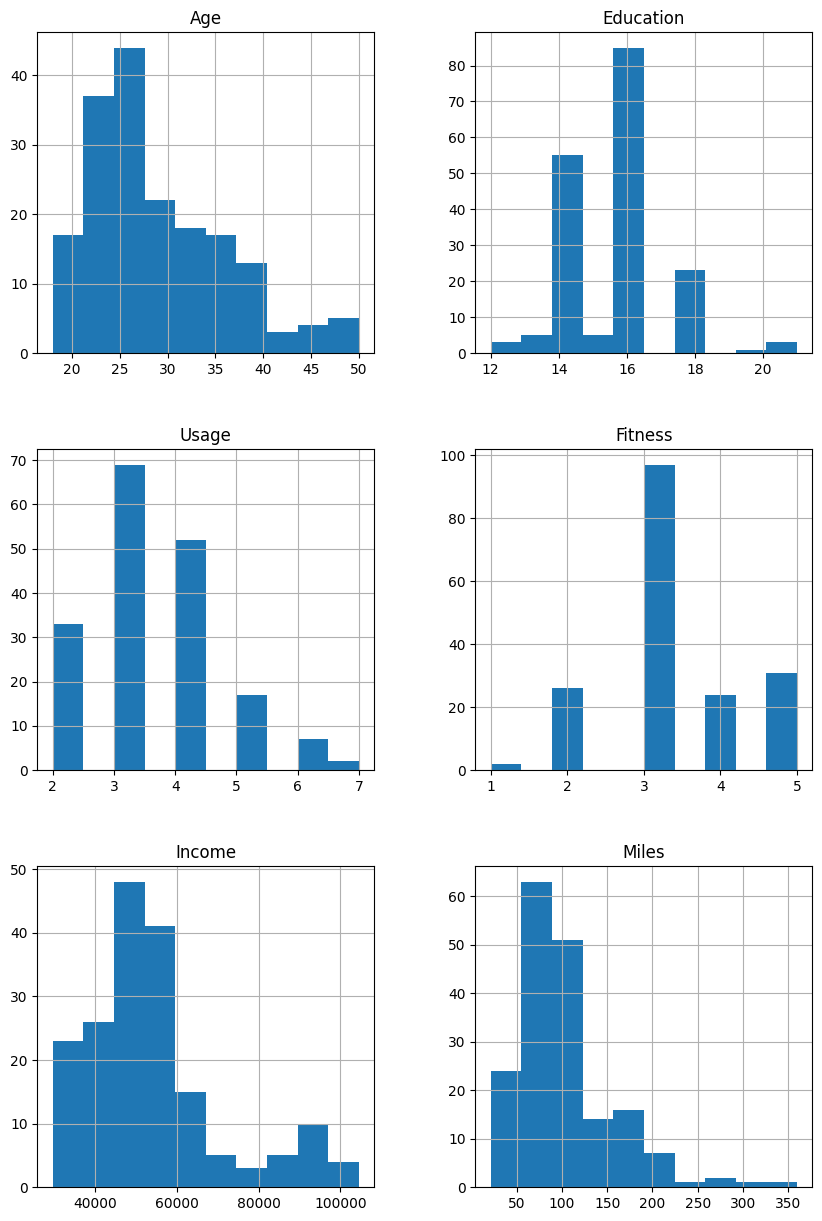

In [36]:
df.hist(figsize=(10,15))

<Axes: xlabel='Gender', ylabel='Age'>

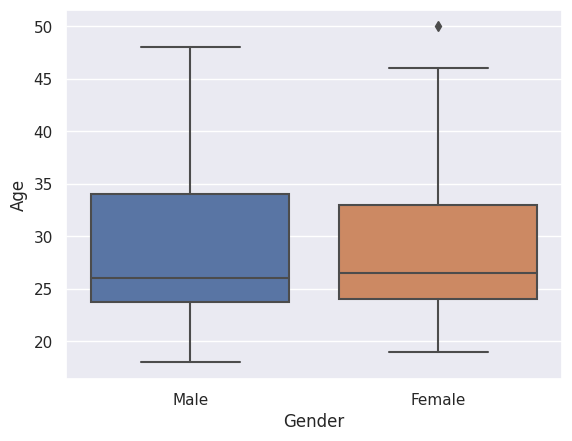

In [52]:
sns.boxplot(x='Gender', y='Age', data=df)

In [34]:
pd.crosstab(df['Product'], df['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


<Axes: xlabel='Product', ylabel='count'>

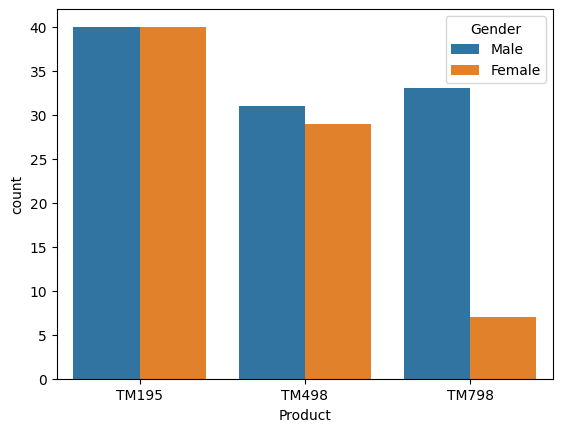

In [37]:
sns.countplot(x='Product', hue='Gender', data=df)

In [39]:
pd.pivot_table(df,
               index=['Product','Gender'],
               columns=['MaritalStatus'],
               aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

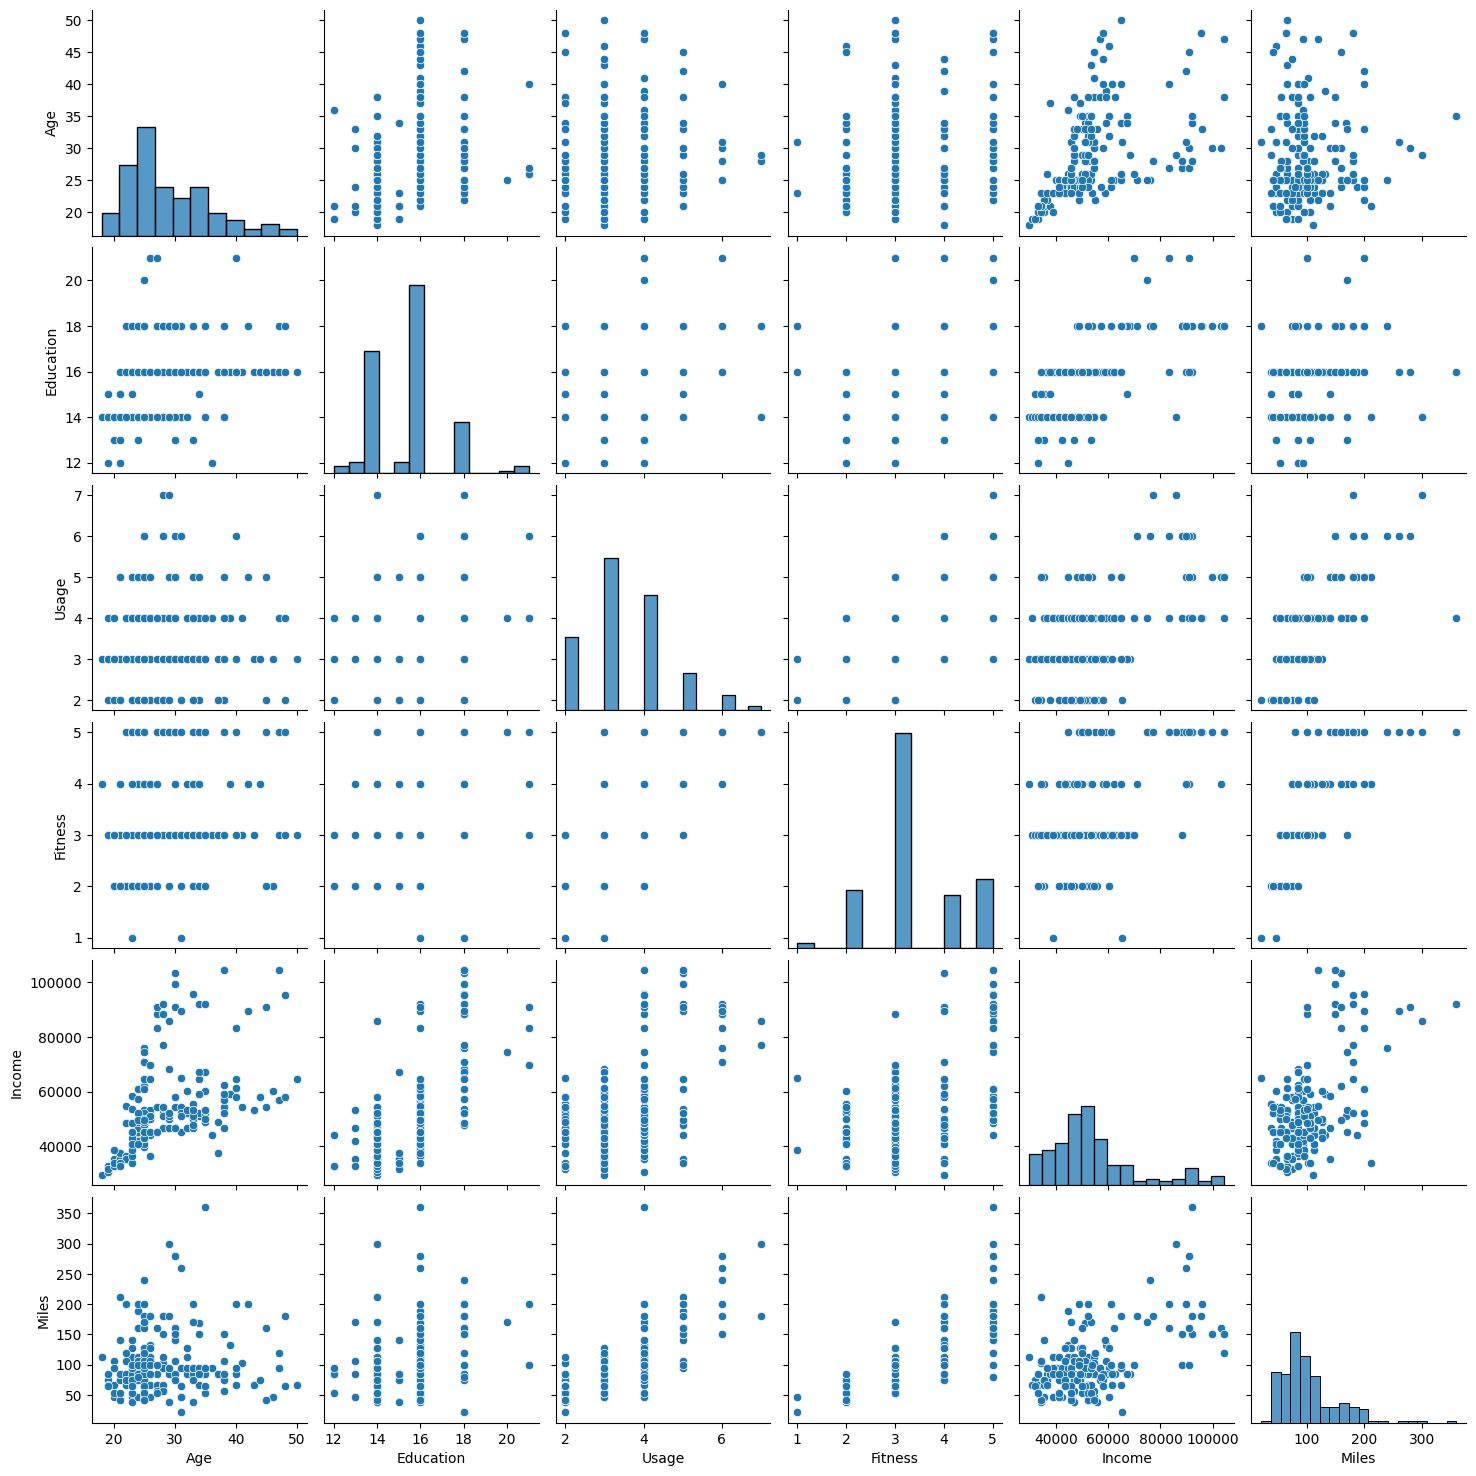

In [40]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Count'>

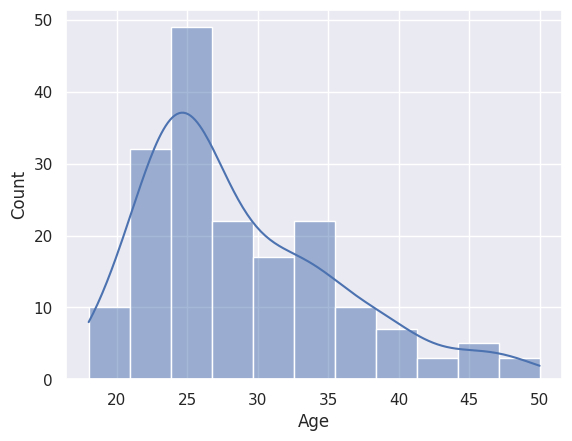

In [46]:
sns.histplot(df["Age"], kde=True)

<ipython-input-59-ebb20c1d72fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

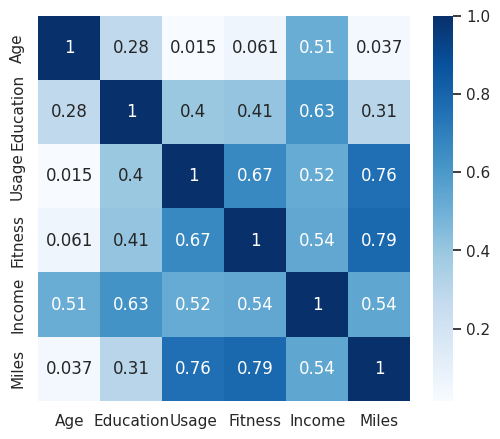

In [59]:
corr = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='Blues')